11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8913 - loss: 0.3379 - val_accuracy: 0.9822 - val_loss: 0.0536
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9842 - loss: 0.0498 - val_accuracy: 0.9859 - val_loss: 0.0427
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9891 - loss: 0.0338 - val_accuracy: 0.9906 - val_loss: 0.0292
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9924 - loss: 0.0252 - val_accuracy: 0.9893 - val_loss: 0.0367
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9930 - loss: 0.0209 - val_accuracy: 0.9867 - val_loss: 0.0463
313/313 - 0s - 1ms/step - accuracy: 0.9867 - loss: 0.0463
Test accuracy: 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


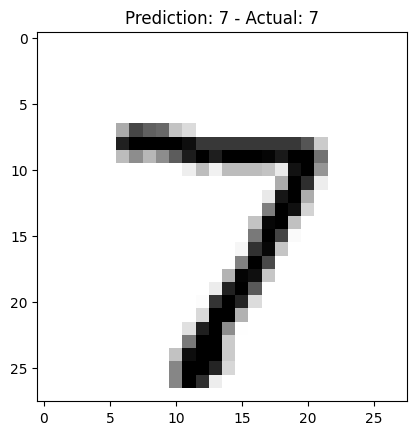

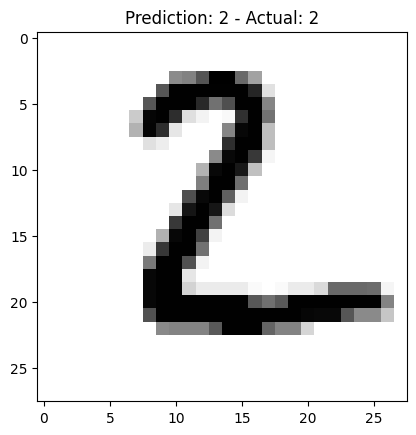

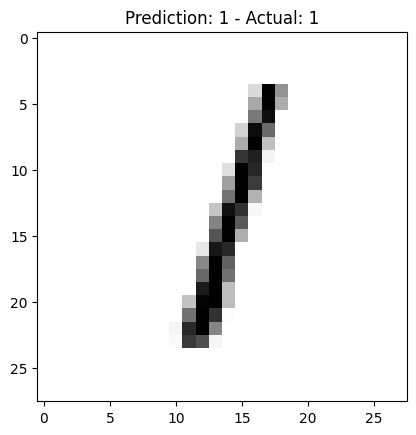

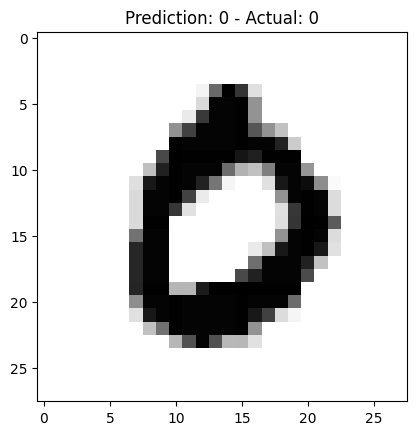

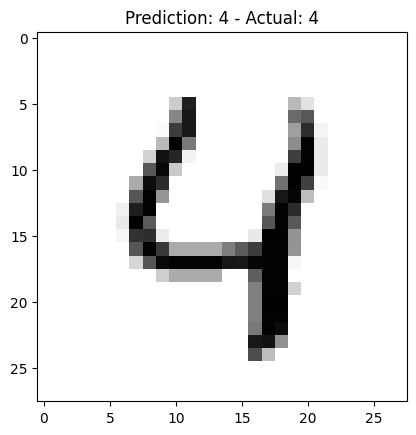

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and prepare the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to add the channel dimension (28, 28, 1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

# Predict some images
predictions = model.predict(test_images[:5])
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Prediction: {predictions[i].argmax()} - Actual: {test_labels[i]}")
    plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8975 - loss: 0.3312 - val_accuracy: 0.9841 - val_loss: 0.0497
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9868 - loss: 0.0452 - val_accuracy: 0.9835 - val_loss: 0.0498
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9906 - loss: 0.0315 - val_accuracy: 0.9894 - val_loss: 0.0336
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9925 - loss: 0.0231 - val_accuracy: 0.9894 - val_loss: 0.0374
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9943 - loss: 0.0185 - val_accuracy: 0.9894 - val_loss: 0.0354
313/313 - 0s - 1ms/step - accuracy: 0.9894 - loss: 0.0354
Test accuracy: 0.99
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


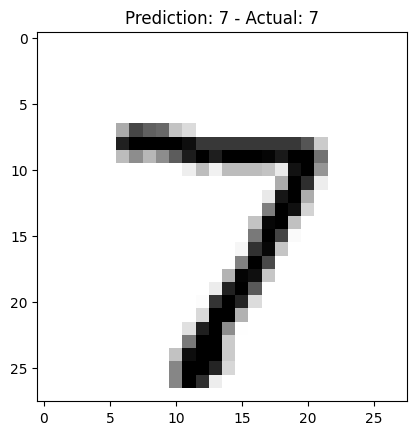

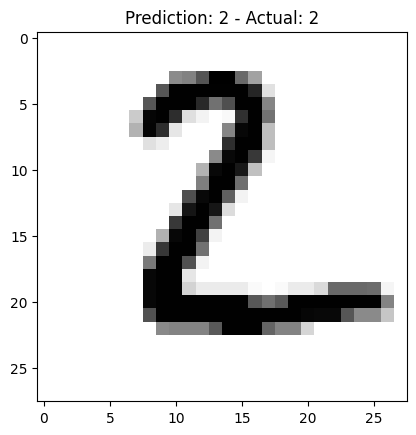

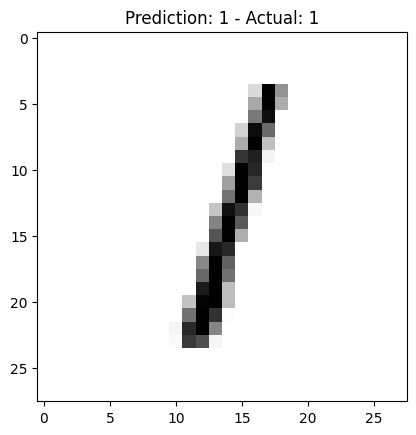

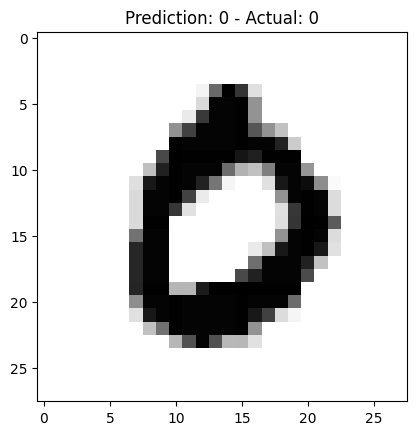

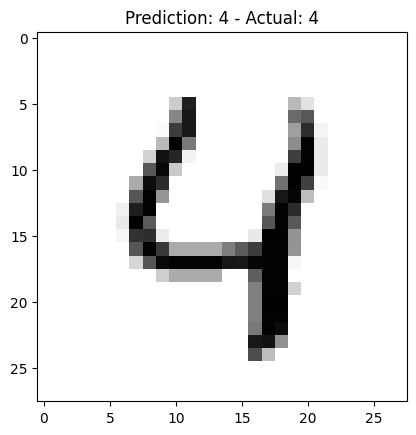

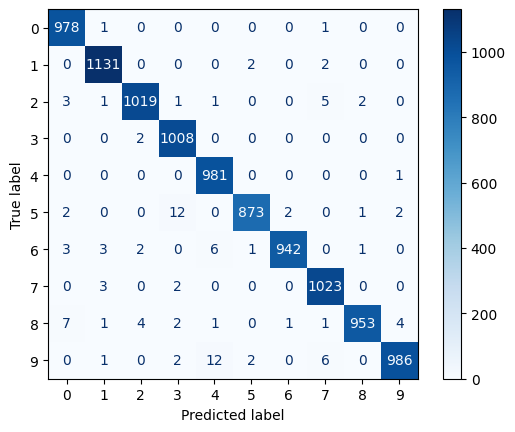

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load and prepare the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to add the channel dimension (28, 28, 1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

# Predict some images
predictions = model.predict(test_images)
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Prediction: {predictions[i].argmax()} - Actual: {test_labels[i]}")
    plt.show()

# Create and display the confusion matrix
y_pred = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=np.arange(10)).plot(cmap=plt.cm.Blues)
plt.show()

Test accuracy: 0.99


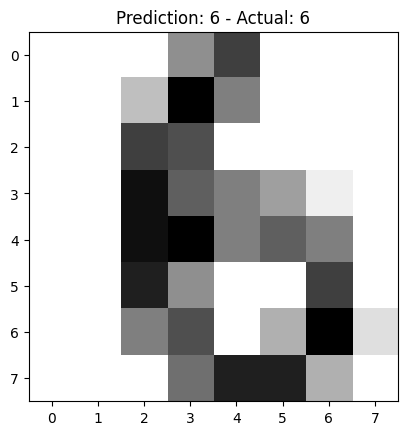

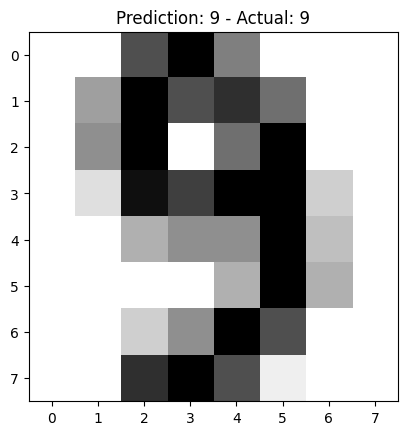

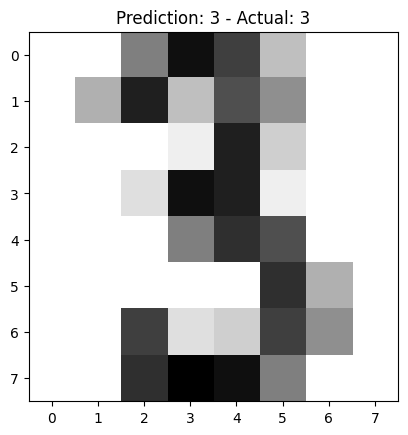

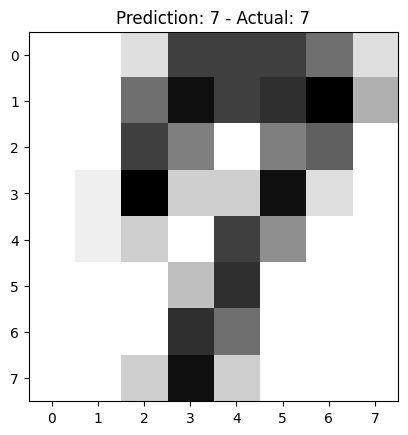

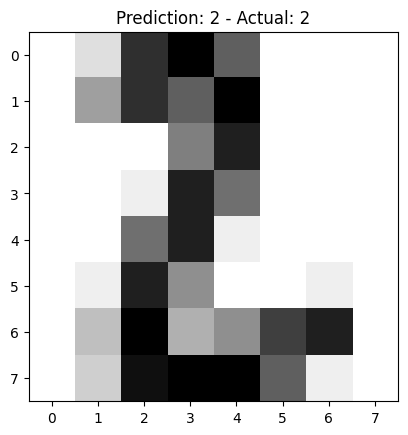

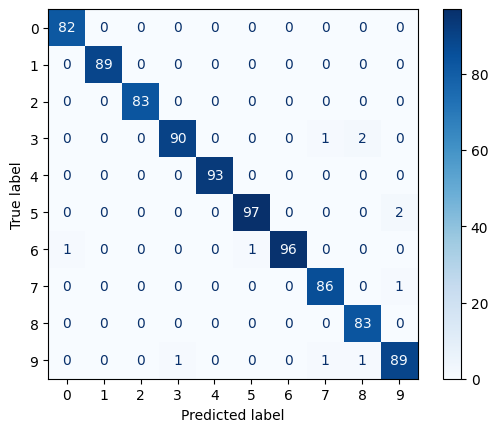

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Load and prepare the MNIST dataset
mnist = datasets.load_digits()

# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(mnist.data, mnist.target, test_size=0.5, random_state=42)

# Create an SVM classifier
classifier = svm.SVC(gamma=0.001, C=100)

# Train the classifier
classifier.fit(train_images, train_labels)

# Predict the labels for the test set
y_pred = classifier.predict(test_images)

# Evaluate the model
accuracy = metrics.accuracy_score(test_labels, y_pred)
print(f"Test accuracy: {accuracy:.2f}")

# Display some predictions
for i in range(5):
    plt.imshow(test_images[i].reshape(8, 8), cmap=plt.cm.binary)
    plt.title(f"Prediction: {y_pred[i]} - Actual: {test_labels[i]}")
    plt.show()

# Create and display the confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=np.arange(10)).plot(cmap=plt.cm.Blues)
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:46:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test accuracy: 0.96


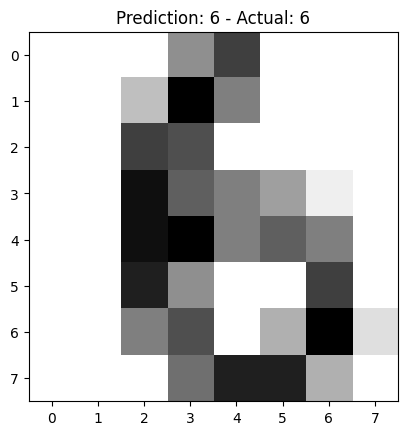

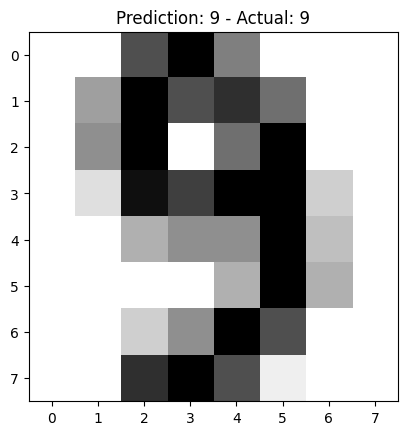

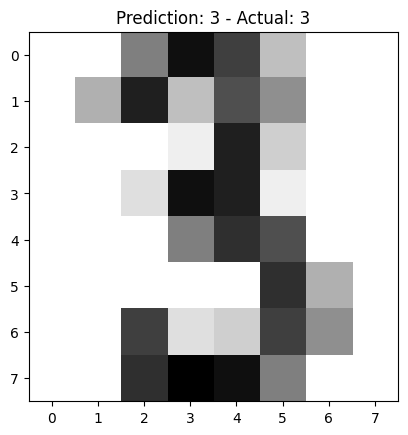

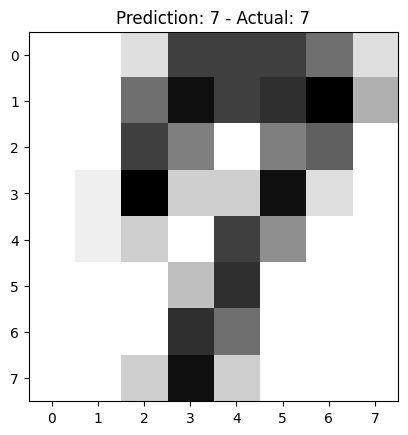

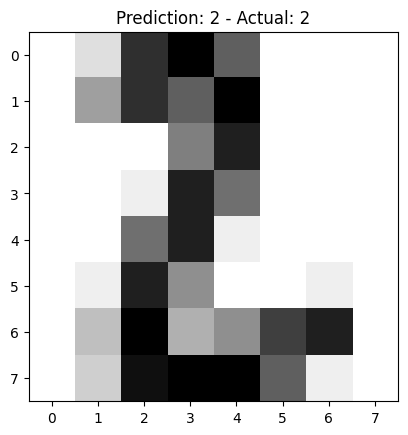

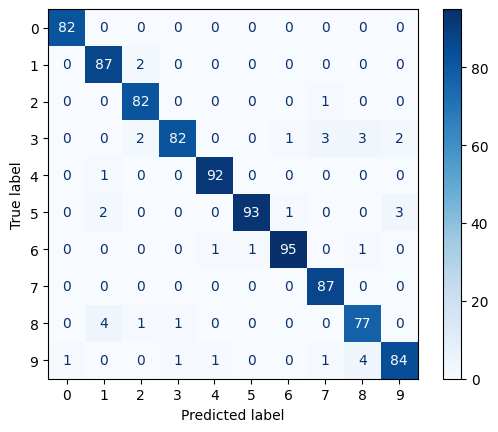

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Load and prepare the MNIST dataset
mnist = datasets.load_digits()

# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(mnist.data, mnist.target, test_size=0.5, random_state=42)

# Create an XGBoost classifier
classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the classifier
classifier.fit(train_images, train_labels)

# Predict the labels for the test set
y_pred = classifier.predict(test_images)

# Evaluate the model
accuracy = metrics.accuracy_score(test_labels, y_pred)
print(f"Test accuracy: {accuracy:.2f}")

# Display some predictions
for i in range(5):
    plt.imshow(test_images[i].reshape(8, 8), cmap=plt.cm.binary)
    plt.title(f"Prediction: {y_pred[i]} - Actual: {test_labels[i]}")
    plt.show()

# Create and display the confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=np.arange(10)).plot(cmap=plt.cm.Blues)
plt.show()